In [212]:
%matplotlib inline

In [213]:
import pylab
import numpy as np
from skimage.io import imread
from skimage import img_as_float
from sklearn.cluster import KMeans

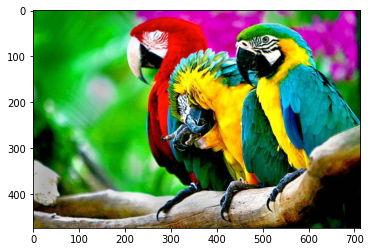

In [214]:
image = imread('parrots.jpg')
pylab.imshow(image)

In [215]:
image = img_as_float(image)
image

array([[[0.01568627, 0.49411765, 0.01960784],
        [0.01176471, 0.49019608, 0.01568627],
        [0.00784314, 0.49411765, 0.00784314],
        ...,
        [0.        , 0.21568627, 0.01568627],
        [0.        , 0.20784314, 0.01568627],
        [0.01176471, 0.21568627, 0.03529412]],

       [[0.01568627, 0.49411765, 0.01960784],
        [0.01176471, 0.49019608, 0.01568627],
        [0.00784314, 0.49411765, 0.00784314],
        ...,
        [0.        , 0.20784314, 0.01176471],
        [0.        , 0.20784314, 0.01568627],
        [0.        , 0.20392157, 0.02352941]],

       [[0.01176471, 0.49019608, 0.01568627],
        [0.01176471, 0.49019608, 0.01568627],
        [0.00784314, 0.49411765, 0.00784314],
        ...,
        [0.        , 0.20784314, 0.01176471],
        [0.        , 0.20784314, 0.01568627],
        [0.        , 0.20392157, 0.02352941]],

       ...,

       [[0.4745098 , 0.37647059, 0.02352941],
        [0.45098039, 0.35294118, 0.        ],
        [0.45098039, 0

In [216]:
m, n, k = image.shape
m, n, k

(474, 713, 3)

In [217]:
X = image.reshape(m * n, k)
X

array([[0.01568627, 0.49411765, 0.01960784],
       [0.01176471, 0.49019608, 0.01568627],
       [0.00784314, 0.49411765, 0.00784314],
       ...,
       [0.02352941, 0.09019608, 0.11764706],
       [0.08235294, 0.16078431, 0.20392157],
       [0.08627451, 0.15686275, 0.23529412]])

In [218]:
def psnr(X_1, X_2):
    mse = 0
    p, k = X_1.shape
    for i in range(p):
        for j in range(k):
            mse += (X_1[i][j] - X_2[i][j])**2
    mse /= (p * k)
    return (10 * np.log10(1.0/mse))

In [219]:
MAX_N_CLUSTERS = 20
nc = 1
score = (0, 0)
good_score = 20
while nc <= MAX_N_CLUSTERS and score[0] <= good_score  and score[1] <= good_score :
    kmeans = KMeans(n_clusters=nc, init='k-means++', random_state=241)
    kmeans.fit(X)
    y = kmeans.labels_
    cluster_labels = list(set(y))
    X_median = np.array(X)
    X_mean = np.array(X)  
    for c in cluster_labels:
        X_median[y == c] = np.median(X_median[y == c], axis=0)
        X_mean[y == c] = np.mean(X_mean[y == c], axis=0)
    score = (psnr(X, X_median), psnr(X, X_mean))
    print(nc, score)
    nc += 1

1 (9.46040825919857, 9.837758895351916)
2 (11.683460422487716, 12.11203558152597)
3 (12.80750299445889, 13.176025694003318)
4 (14.037910547309423, 14.394294489215264)
5 (15.206561560821317, 15.559946338769045)
6 (16.0823533327476, 16.57272547165876)
7 (17.366035472859505, 17.67192327088113)
8 (18.175619955254664, 18.46813382719524)
9 (18.85103065321563, 19.14487020268973)
10 (19.450611158660664, 19.675498079719272)
11 (19.89810890980681, 20.1621606282827)


In [221]:
image_median = X_median.reshape((m, n, k))
image_mean = X_mean.reshape((m, n, k))

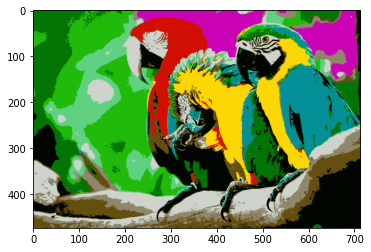

In [222]:
pylab.imshow(image_median)

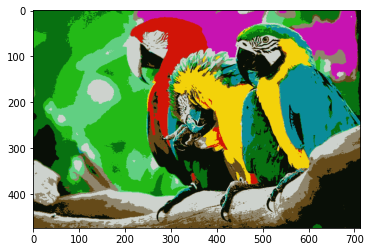

In [223]:
pylab.imshow(image_mean)

In [225]:
out = open('q1.txt', 'w')
out.write(str(nc - 1))
out.close()